In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/JesusNoelValMo/Machine_Learning_Book/master/Projects/car_price_prediction/car_price/CarPrice_Assignment.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
data = data.drop(columns=['car_ID', 'symboling'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [7]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
num_data = data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize', 'horsepower', 'peakrpm','citympg', 'highwaympg', 'price']]
#Volume of the car
num_data['vol_car'] = num_data.apply(lambda x: x['carlength']*x['carwidth']*x['carheight'], axis=1)
#avrg mpg
num_data['avrg_mpg'] = num_data.apply(lambda x: (x['citympg']+x['highwaympg'])/2, axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
num_data.describe()


,wheelbase,carlength,carwidth,carheight,enginesize,horsepower,peakrpm,citympg,highwaympg,price,vol_car,avrg_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,126.907317,104.117073,5125.121951,25.219512,30.751220,13276.710571,618719.288873,27.985366
std,6.021776,12.337289,2.145204,2.443522,41.642693,39.544167,476.985643,6.542142,6.886443,7988.852332,79463.195262,6.666038
min,86.600000,141.100000,60.300000,47.800000,61.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,452643.156000,15.000000
25%,94.500000,166.300000,64.100000,52.000000,97.000000,70.000000,4800.000000,19.000000,25.000000,7788.000000,566490.600000,22.500000
50%,97.000000,173.200000,65.500000,54.100000,120.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,601385.700000,27.000000
75%,102.400000,183.100000,66.900000,55.500000,141.000000,116.000000,5500.000000,30.000000,34.000000,16503.000000,666250.200000,32.000000
max,120.900000,208.100000,72.300000,59.800000,326.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,846007.659000,51.500000


Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'vol_car',
       'avrg_mpg'],
      dtype='object')

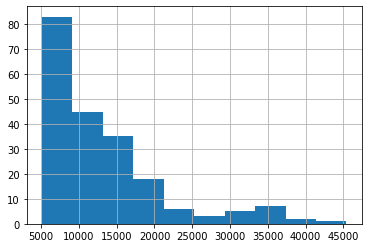

In [10]:
num_data['price'].hist()
num_data.columns

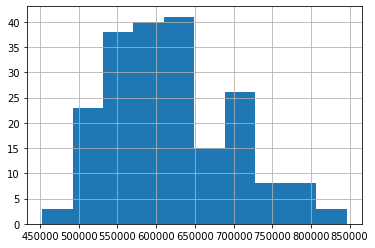

In [11]:
num_data['vol_car'].hist()

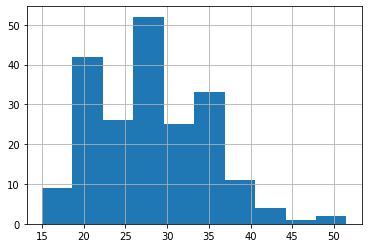

In [12]:
num_data['avrg_mpg'].hist()

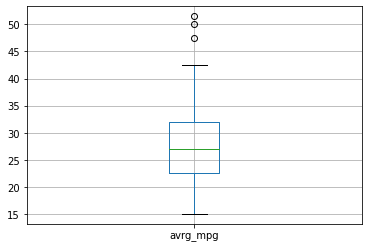

In [13]:
num_data.boxplot(column= 'avrg_mpg')

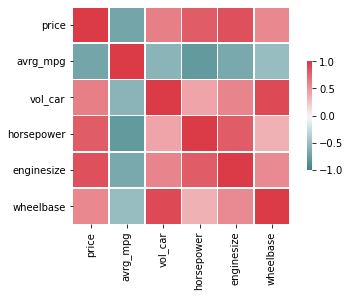

In [14]:
#See correlations 
cmap = sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(num_data[['price', 'avrg_mpg', 'vol_car', 'horsepower', 'enginesize', "wheelbase"]].corr(), vmax=1,vmin=-1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
num_data[['price', 'avrg_mpg', 'vol_car', 'horsepower', 'enginesize']].corr()

,price,avrg_mpg,vol_car,horsepower,enginesize
price,1.000000,-0.696835,0.624339,0.808139,0.874145
avrg_mpg,-0.696835,1.000000,-0.581196,-0.791291,-0.670689
vol_car,0.624339,-0.581196,1.000000,0.428573,0.594351
horsepower,0.808139,-0.791291,0.428573,1.000000,0.809769
enginesize,0.874145,-0.670689,0.594351,0.809769,1.000000


In [29]:
data.columns
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [32]:
cat_data = data[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',	'cylindernumber', "fuelsystem"]]

fueltype


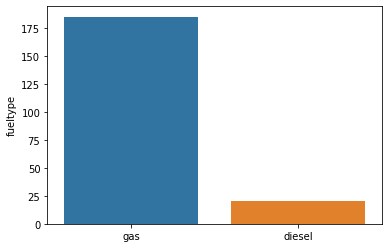

aspiration


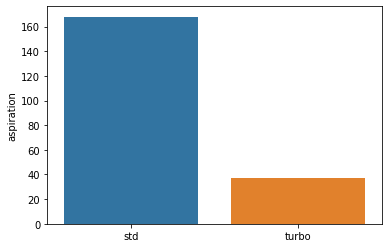

carbody


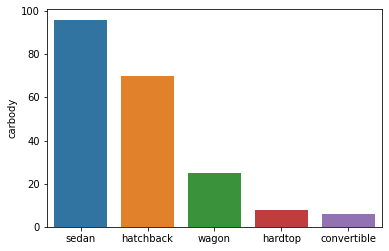

drivewheel


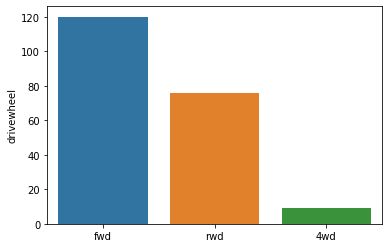

enginelocation


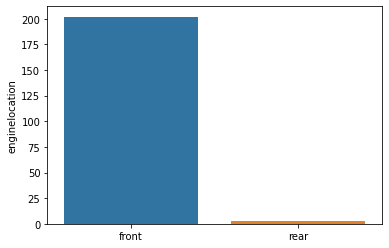

enginetype


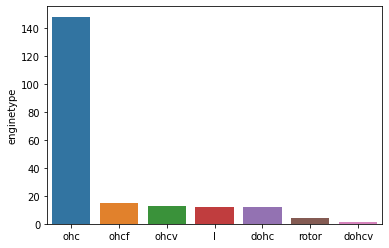

cylindernumber


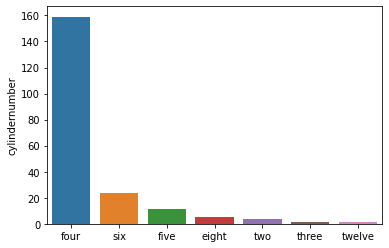

fuelsystem


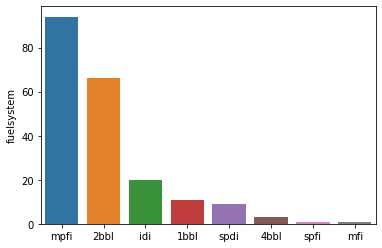

In [35]:
#plot our cat data 

for i in cat_data.columns:
  cat_num = cat_data[i].value_counts()
  print(i)
  sns.barplot(x=cat_num.index, y=cat_num)
  plt.show()


In [41]:
pd.pivot_table(data, index= [ 'enginetype',	'cylindernumber' ], values='price').sort_values('price', ascending=False)

price
enginetype cylindernumber              
ohcv       eight           38900.000000
           twelve          36000.000000
ohcf       six             34528.000000
dohcv      eight           31400.500000
ohc        six             28295.000000
dohc       six             21966.000000
ohc        five            21630.469727
ohcv       six             16834.875000
l          four            15489.090909
dohc       four            14266.833333
rotor      two             13020.000000
ohc        four             9822.761538
ohcf       four             8541.250000
l          three            5151.000000

In [44]:


#Volume of the car
data['vol_car'] = num_data.apply(lambda x: x['carlength']*x['carwidth']*x['carheight'], axis=1)
#avrg mpg
data['avrg_mpg'] = num_data.apply(lambda x: (x['citympg']+x['highwaympg'])/2, axis=1)
data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'vol_car', 'avrg_mpg'],
      dtype='object')

In [45]:
model_df = data[['fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','wheelbase', 'carlength', 'carwidth',
       'carheight','enginetype',	'cylindernumber', 'enginesize',"fuelsystem", 'horsepower','peakrpm', 'citympg', 'highwaympg', 'vol_car', 'avrg_mpg','price']]

In [52]:
model_df = pd.get_dummies(model_df)
model_df

,wheelbase,carlength,carwidth,carheight,enginesize,horsepower,peakrpm,citympg,highwaympg,vol_car,avrg_mpg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,130,111,5000,21,27,528019.904,24.0,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,130,111,5000,21,27,528019.904,24.0,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,152,154,5000,19,26,587592.640,22.5,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,109,102,5500,24,30,634816.956,27.0,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,136,115,5500,18,22,636734.832,20.0,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,141,114,5400,23,28,721961.760,25.5,16845.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,141,160,5300,19,25,720913.920,22.0,19045.0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,173,134,5500,18,23,721961.760,20.5,21485.0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,145,106,4800,26,27,721961.760,26.5,22470.0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [53]:
#Let's Train!!!!
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
X = model_df.drop(columns='price')
y = model_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)
np.mean(cross_val_score(lin_regressor, X_train, y_train, scoring="neg_mean_absolute_error", cv=3))

-2119.5200487857614

In [72]:
lasso_reg = Lasso(alpha=0.5,  max_iter=1)
lasso_reg.fit(X_train, y_train)
np.mean(cross_val_score(lasso_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=3))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 892853787.1995987, tolerance: 978060.533130488
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489583056.1970252, tolerance: 736244.8867243119
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688953184.7910143, tolerance: 700290.0159862385
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470511983.269

-3105.309888494319

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193481225.37033984, tolerance: 736244.8867243119
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225475190.9242586, tolerance: 700290.0159862385
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141878867.18454278, tolerance: 507838.2848593183
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191022841.

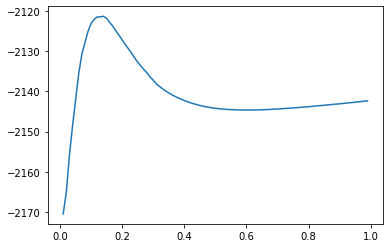

In [85]:
alpha = []
error = []
for i in range(1,100):
  alpha.append(i/100)
  lasso_reg = Lasso(alpha=i/100, max_iter=i*100)
  error.append(np.mean(cross_val_score(lasso_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)))


plt.plot(alpha, error)




In [86]:
err= tuple(zip(alpha,error))
df_error = pd.DataFrame(err, columns= ["alpha", "error"])
df_error[df_error.error == max(df_error.error)]

,alpha,error
13,0.14,-2121.341473


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203476834.06156194, tolerance: 736244.8867243119
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237551350.93309903, tolerance: 700290.0159862385
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150045154.11954477, tolerance: 507838.2848593183
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208953666

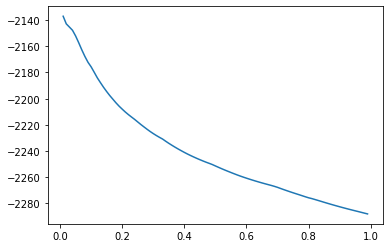

In [89]:
alpha = []
error = []
for i in range(1,100):
  alpha.append(i/100)
  elastic_net_reg = ElasticNet(alpha=i/100, max_iter=i*100, l1_ratio=0.9)
  error.append(np.mean(cross_val_score(elastic_net_reg, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)))


plt.plot(alpha, error)

